In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
data=pd.read_csv('bdp (2).csv')
data.head()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72


In [3]:
data.isnull().sum()

Sl. No.               0
Pulse                 0
Systolic Pressure     0
Diastolic Pressure    0
dtype: int64

In [4]:
x=data.iloc[:,2:4] #target data
y=data.iloc[:,1:2] #feature data
x.head()

,Systolic Pressure,Diastolic Pressure
0,128,78
1,127,73
2,129,78
3,125,69
4,125,72


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
y_train

,Pulse
137,73
84,68
27,75
127,81
132,68
...,...
9,77
103,70
67,70
117,84


In [7]:
data['Systolic Pressure'].unique()

array([128, 127, 129, 125, 121, 124, 120, 126, 122, 123, 131, 117, 134,
       130, 116, 109, 118, 115, 113, 119], dtype=int64)

In [8]:
data['Diastolic Pressure'].unique()

array([78, 73, 69, 72, 75, 71, 77, 70, 76, 74, 82, 84, 86, 83, 80, 88, 81,
       79, 90, 89, 87, 67, 68, 92], dtype=int64)

C:\Users\SUBHAJIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pulse', ylabel='count'>

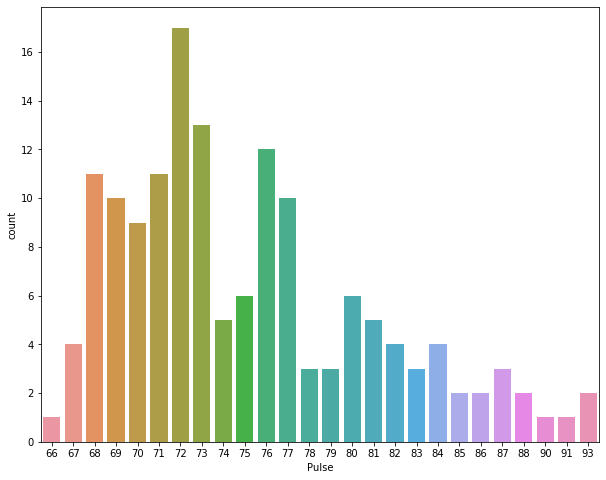

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data['Pulse'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sl. No.             150 non-null    int64
 1   Pulse               150 non-null    int64
 2   Systolic Pressure   150 non-null    int64
 3   Diastolic Pressure  150 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [11]:
data.describe()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
count,150.000000,150.000000,150.000000,150.000000
mean,75.500000,75.153333,124.406667,76.533333
std,43.445368,5.994110,4.000162,5.288542
min,1.000000,66.000000,109.000000,67.000000
25%,38.250000,71.000000,122.000000,73.000000
50%,75.500000,73.000000,125.000000,76.000000
75%,112.750000,78.750000,127.000000,79.750000
max,150.000000,93.000000,134.000000,92.000000


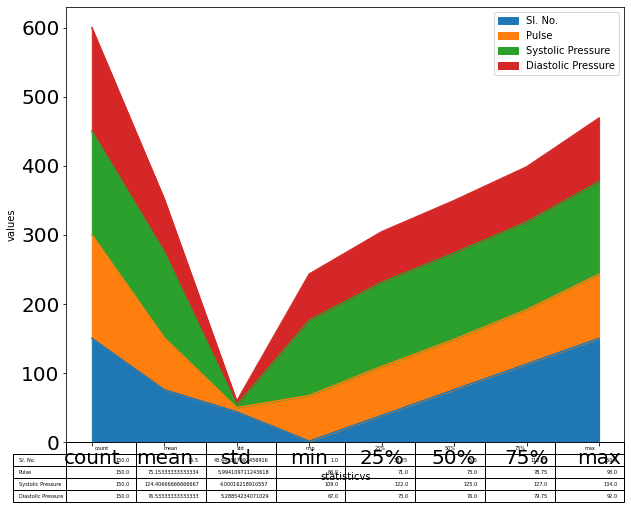

In [12]:
data.describe().plot(kind='area',fontsize=20,figsize=(10,8),table=True)
plt.xlabel('statisticvs')
plt.ylabel('values')
plt.show()

In [13]:
data['Pulse'].mean()

75.15333333333334

In [14]:
data['Pulse'].median()

73.0

In [15]:
data['Pulse'].std()

5.994109711243618

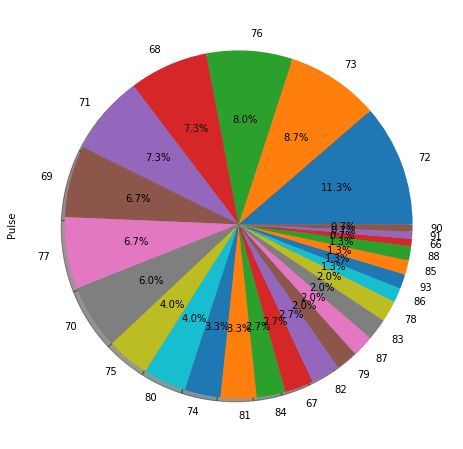

In [16]:
plt.figure(figsize=(10,8))
data['Pulse'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

<AxesSubplot:>

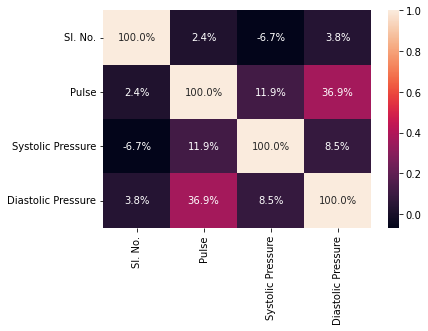

In [17]:
sns.heatmap(data.corr(),annot=True,fmt='.1%')

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
prediction=lr.predict(x_test)
error=np.sqrt(metrics.mean_squared_error(y_test,prediction))
error

6.568280941255361

Text(0.5, 1.0, 'training data point')

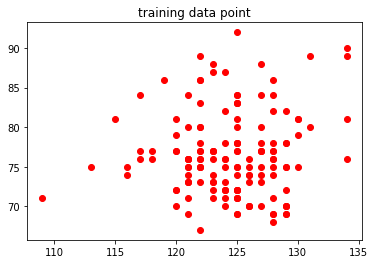

In [20]:
plt.scatter(data['Systolic Pressure'],data['Diastolic Pressure'],color='red')
plt.title('training data point')
#plt.scatter(x_test,y_test,color='yellow')
#plt.title('testing data point')

In [21]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)

Lasso(alpha=0.001)

In [22]:
pred1=ls.predict(x_test)
pred1

array([75.11733292, 73.32116721, 71.44990168, 71.81094215, 71.09247587,
       74.90287743, 79.21367515, 76.19503235, 75.98057686, 68.3579664 ,
       75.32998109, 74.68661462, 75.18881809, 74.18260382, 72.8904489 ,
       82.37709559, 74.39886664, 75.26211058, 75.33178841, 72.52940844,
       74.9743626 , 72.67418609, 77.27273178, 75.98057686, 73.5356227 ,
       72.74567125, 75.47656607, 72.52940844, 74.54183697, 78.49340154])

In [23]:
from sklearn import metrics 
import numpy as np
rmse1=np.sqrt(metrics.mean_squared_error(y_test,pred1))
rmse1

6.568187522697739

In [24]:
mse1=metrics.mean_squared_error(y_test,pred1)
mse1

43.14108733332226

In [25]:
mae1=metrics.mean_absolute_error(y_test,pred1)
mae1

5.442777238268419

In [26]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
pred2=rd.predict(x_test)
pred2

array([[75.11737828],
       [73.32103657],
       [71.44924069],
       [71.81050931],
       [71.09197263],
       [74.90301744],
       [79.21423754],
       [76.1951833 ],
       [75.98082246],
       [68.35673257],
       [75.32973884],
       [74.68665632],
       [75.18883189],
       [74.18248048],
       [72.89031461],
       [82.37819928],
       [74.39884159],
       [75.26228578],
       [75.33173911],
       [72.52904599],
       [74.97447105],
       [72.6739535 ],
       [77.27298833],
       [75.98082246],
       [73.53539741],
       [72.74540711],
       [75.47664662],
       [72.52904599],
       [74.54174882],
       [78.49370058]])

In [27]:
rmse2=np.sqrt(metrics.mean_squared_error(y_test,pred2))
rmse2

6.568280736070699

In [28]:
mse2=metrics.mean_squared_error(y_test,pred2)
mse2

43.142311827837446

In [29]:
mae2=metrics.mean_absolute_error(y_test,pred2)
mae2

5.442766967623917